The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==1.0.3


# Calculus
:label:`sec_calculus`

For a long time, how to calculate 
the area of a circle remained a mystery.
Then, in Ancient Greece, the mathematician Archimedes
came up with the clever idea 
to inscribe a series of polygons 
with increasing numbers of vertices
on the inside of a circle
(:numref:`fig_circle_area`). 
For a polygon with $n$ vertices,
we obtain $n$ triangles.
The height of each triangle approaches the radius $r$ 
as we partition the circle more finely. 
At the same time, its base approaches $2 \pi r/n$, 
since the ratio between arc and secant approaches 1 
for a large number of vertices. 
Thus, the area of the polygon approaches
$n \cdot r \cdot \frac{1}{2} (2 \pi r/n) = \pi r^2$.

![Finding the area of a circle as a limit procedure.](../img/polygon-circle.svg)
:label:`fig_circle_area`

This limiting procedure is at the root of both 
*differential calculus* and *integral calculus*. 
The former can tell us how to increase
or decrease a function's value by
manipulating its arguments. 
This comes in handy for the *optimization problems*
that we face in deep learning,
where we repeatedly update our parameters 
in order to decrease the loss function.
Optimization addresses how to fit our models to training data,
and calculus is its key prerequisite.
However, do not forget that our ultimate goal
is to perform well on *previously unseen* data.
That problem is called *generalization*
and will be a key focus of other chapters.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## Derivatives and Differentiation

Put simply, a *derivative* is the rate of change
in a function with respect to changes in its arguments.
Derivatives can tell us how rapidly a loss function
would increase or decrease were we 
to *increase* or *decrease* each parameter
by an infinitesimally small amount.
Formally, for functions $f: \mathbb{R} \rightarrow \mathbb{R}$,
that map from scalars to scalars,
[**the *derivative* of $f$ at a point $x$ is defined as**]

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`

This term on the right hand side is called a *limit* 
and it tells us what happens 
to the value of an expression
as a specified variable 
approaches a particular value.
This limit tells us what 
the ratio between a perturbation $h$
and the change in the function value 
$f(x + h) - f(x)$ converges to 
as we shrink its size to zero.

When $f'(x)$ exists, $f$ is said 
to be *differentiable* at $x$;
and when $f'(x)$ exists for all $x$
on a set, e.g., the interval $[a,b]$, 
we say that $f$ is differentiable on this set.
Not all functions are differentiable,
including many that we wish to optimize,
such as accuracy and the area under the
receiving operating characteristic (AUC).
However, because computing the derivative of the loss 
is a crucial step in nearly all 
algorithms for training deep neural networks,
we often optimize a differentiable *surrogate* instead.


We can interpret the derivative 
$f'(x)$
as the *instantaneous* rate of change 
of $f(x)$ with respect to $x$.
Let's develop some intuition with an example.
(**Define $u = f(x) = 3x^2-4x$.**)


In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

[**Setting $x=1$, we see that $\frac{f(x+h) - f(x)}{h}$**] (**approaches $2$
as $h$ approaches $0$.**)
While this experiment lacks 
the rigor of a mathematical proof,
we can quickly see that indeed $f'(1) = 2$.


In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


There are several equivalent notational conventions for derivatives.
Given $y = f(x)$, the following expressions are equivalent:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where the symbols $\frac{d}{dx}$ and $D$ are *differentiation operators*.
Below, we present the derivatives of some common functions:

$$\begin{aligned} \frac{d}{dx} C & = 0 && \textrm{for any constant $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \textrm{for } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1}. \end{aligned}$$

Functions composed from differentiable functions 
are often themselves differentiable.
The following rules come in handy 
for working with compositions 
of any differentiable functions 
$f$ and $g$, and constant $C$.

$$\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{Constant multiple rule} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{Sum rule} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{Product rule} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{Quotient rule} \end{aligned}$$

Using this, we can apply the rules 
to find the derivative of $3 x^2 - 4x$ via

$$\frac{d}{dx} [3 x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4.$$

Plugging in $x = 1$ shows that, indeed, 
the derivative equals $2$ at this location. 
Note that derivatives tell us 
the *slope* of a function 
at a particular location.  

## Visualization Utilities

[**We can visualize the slopes of functions using the `matplotlib` library**].
We need to define a few functions. 
As its name indicates, `use_svg_display` 
tells `matplotlib` to output graphics 
in SVG format for crisper images. 
The comment `#@save` is a special modifier 
that allows us to save any function, 
class, or other code block to the `d2l` package 
so that we can invoke it later 
without repeating the code, 
e.g., via `d2l.use_svg_display()`.


In [4]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

Conveniently, we can set figure sizes with `set_figsize`. 
Since the import statement `from matplotlib import pyplot as plt` 
was marked via `#@save` in the `d2l` package, we can call `d2l.plt`.


In [5]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

The `set_axes` function can associate axes
with properties, including labels, ranges,
and scales.


In [6]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

With these three functions, we can define a `plot` function 
to overlay multiple curves. 
Much of the code here is just ensuring 
that the sizes and shapes of inputs match.


In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Now we can [**plot the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$**],
where the coefficient $2$ is the slope of the tangent line.


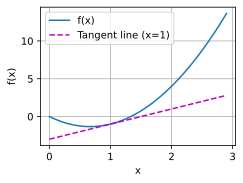

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Partial Derivatives and Gradients
:label:`subsec_calculus-grad`

Thus far, we have been differentiating
functions of just one variable.
In deep learning, we also need to work
with functions of *many* variables.
We briefly introduce notions of the derivative
that apply to such *multivariate* functions.


Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables. 
The *partial derivative* of $y$ 
with respect to its $i^\textrm{th}$ parameter $x_i$ is

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$


To calculate $\frac{\partial y}{\partial x_i}$, 
we can treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants 
and calculate the derivative of $y$ with respect to $x_i$.
The following notational conventions for partial derivatives 
are all common and all mean the same thing:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

We can concatenate partial derivatives 
of a multivariate function 
with respect to all its variables 
to obtain a vector that is called
the *gradient* of the function.
Suppose that the input of function 
$f: \mathbb{R}^n \rightarrow \mathbb{R}$ 
is an $n$-dimensional vector 
$\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ 
and the output is a scalar. 
The gradient of the function $f$ 
with respect to $\mathbf{x}$ 
is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$ 

When there is no ambiguity,
$\nabla_{\mathbf{x}} f(\mathbf{x})$ 
is typically replaced 
by $\nabla f(\mathbf{x})$.
The following rules come in handy 
for differentiating multivariate functions:

* For all $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$ and $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$.
* For square matrices $\mathbf{A} \in \mathbb{R}^{n \times n}$ we have that $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$ and in particular
$\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$.

Similarly, for any matrix $\mathbf{X}$, 
we have $\nabla_{\mathbf{X}} \|\mathbf{X} \|_\textrm{F}^2 = 2\mathbf{X}$. 



## Chain Rule

In deep learning, the gradients of concern
are often difficult to calculate
because we are working with 
deeply nested functions 
(of functions (of functions...)).
Fortunately, the *chain rule* takes care of this. 
Returning to functions of a single variable,
suppose that $y = f(g(x))$
and that the underlying functions 
$y=f(u)$ and $u=g(x)$ 
are both differentiable.
The chain rule states that 


$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$



Turning back to multivariate functions,
suppose that $y = f(\mathbf{u})$ has variables
$u_1, u_2, \ldots, u_m$, 
where each $u_i = g_i(\mathbf{x})$ 
has variables $x_1, x_2, \ldots, x_n$,
i.e.,  $\mathbf{u} = g(\mathbf{x})$.
Then the chain rule states that

$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ and so } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,$$

where $\mathbf{A} \in \mathbb{R}^{n \times m}$ is a *matrix*
that contains the derivative of vector $\mathbf{u}$
with respect to vector $\mathbf{x}$.
Thus, evaluating the gradient requires 
computing a vector--matrix product. 
This is one of the key reasons why linear algebra 
is such an integral building block 
in building deep learning systems. 



## Discussion

While we have just scratched the surface of a deep topic,
a number of concepts already come into focus: 
first, the composition rules for differentiation
can be applied routinely, enabling
us to compute gradients *automatically*.
This task requires no creativity and thus 
we can focus our cognitive powers elsewhere.
Second, computing the derivatives of vector-valued functions 
requires us to multiply matrices as we trace 
the dependency graph of variables from output to input. 
In particular, this graph is traversed in a *forward* direction 
when we evaluate a function 
and in a *backwards* direction 
when we compute gradients. 
Later chapters will formally introduce backpropagation,
a computational procedure for applying the chain rule.

From the viewpoint of optimization, gradients allow us 
to determine how to move the parameters of a model
in order to lower the loss,
and each step of the optimization algorithms used 
throughout this book will require calculating the gradient.

## Exercises

1. So far we took the rules for derivatives for granted. 
   Using the definition and limits prove the properties 
   for (i) $f(x) = c$, (ii) $f(x) = x^n$, (iii) $f(x) = e^x$ and (iv) $f(x) = \log x$.
1. In the same vein, prove the product, sum, and quotient rule from first principles. 
1. Prove that the constant multiple rule follows as a special case of the product rule. 
1. Calculate the derivative of $f(x) = x^x$. 
1. What does it mean that $f'(x) = 0$ for some $x$? 
   Give an example of a function $f$ 
   and a location $x$ for which this might hold. 
1. Plot the function $y = f(x) = x^3 - \frac{1}{x}$ 
   and plot its tangent line at $x = 1$.
1. Find the gradient of the function 
   $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.
1. What is the gradient of the function 
   $f(\mathbf{x}) = \|\mathbf{x}\|_2$? What happens for $\mathbf{x} = \mathbf{0}$?
1. Can you write out the chain rule for the case 
   where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?
1. Given a function $f(x)$ that is invertible, 
   compute the derivative of its inverse $f^{-1}(x)$. 
   Here we have that $f^{-1}(f(x)) = x$ and conversely $f(f^{-1}(y)) = y$. 
   Hint: use these properties in your derivation.


[Discussions](https://discuss.d2l.ai/t/33)
